In [18]:
import os
from os.path import isfile,join
from skimage.io import imread, imsave
from matplotlib.pyplot import imshow
import numpy as np
from skimage.filters import gaussian
from skimage.exposure import rescale_intensity
from skimage.util import random_noise
from skimage import transform

In [34]:
class Blur:
    def __init__(self, sigma):
        self.sigma = sigma
        self.code = 'blur'

    def process(self, img):
        is_colour = len(img.shape)==3
        return rescale_intensity(gaussian(img, sigma=self.sigma, channel_axis=is_colour))
    
class FlipH:
    def __init__(self):
        self.code = 'fliph'

    def process(self, img):
        return np.fliplr(img)
    
class FlipV:
    def __init__(self):
        self.code = 'flipv'

    def process(self, img):
        return np.flipud(img)
    
class Noise:
    def __init__(self, var):
        self.var = var
        self.code = 'noise'

    def process(self, img):
        return random_noise(img, mode='gaussian', var=self.var)
    
class Rotate:
    def __init__(self, angle):
        self.angle = angle
        self.code = 'rotate'

    def process(self, img):
        return transform.rotate(img, -self.angle)

class Zoom:
    def __init__(self, p1x, p1y, p2x, p2y):
        self.p1x = p1x
        self.p1y = p1y
        self.p2x = p2x
        self.p2y = p2y
        self.code = 'zoom'

    def process(self, img):
        h = len(img)
        w = len(img[0])

        crop_p1x = max(self.p1x, 0)
        crop_p1y = max(self.p1y, 0)
        crop_p2x = min(self.p2x, w)
        crop_p2y = min(self.p2y, h)

        cropped_img = img[crop_p1y:crop_p2y, crop_p1x:crop_p2x]

        x_pad_before = -min(0, self.p1x)
        x_pad_after  =  max(0, self.p2x-w)
        y_pad_before = -min(0, self.p1y)
        y_pad_after  =  max(0, self.p2y-h)

        padding = [(y_pad_before, y_pad_after), (x_pad_before, x_pad_after)]
        is_colour = len(img.shape) == 3
        if is_colour:
            padding.append((0,0)) # colour images have an extra dimension

        padded_img = np.pad(cropped_img, padding, 'constant')
        return transform.resize(padded_img, (h,w))

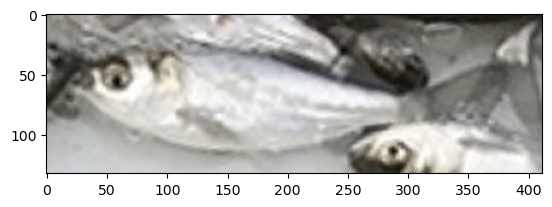

In [38]:
img_path = 'SilverCarp/silver_carp0.png'
img = imread(img_path)
img_aug_path = 'SilverCarp_aug'
imshow(img)

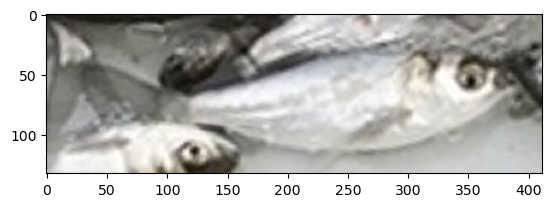

In [39]:
img_path = 'SilverCarp/silver_carp0.png'
img = imread(img_path)
img_aug_path = 'SilverCarp_aug'

out_file_name = 'silver_carp0_fliph'
op = FlipH()
new_img = op.process(img)
imshow(new_img)

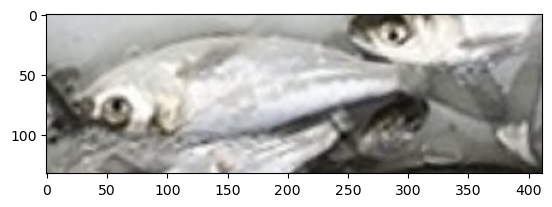

In [36]:
op = FlipV()
new_img = op.process(img)
imshow(new_img)

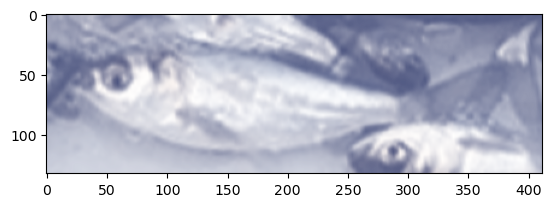

In [37]:
op = Blur(1.0)
new_img = op.process(img)
imshow(new_img)

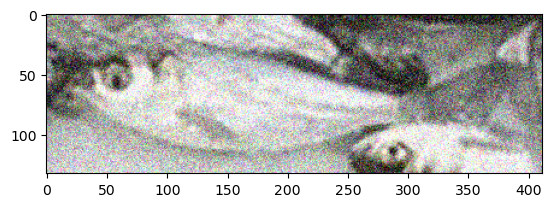

In [28]:
op = Noise(0.02)
new_img = op.process(img)
imshow(new_img)

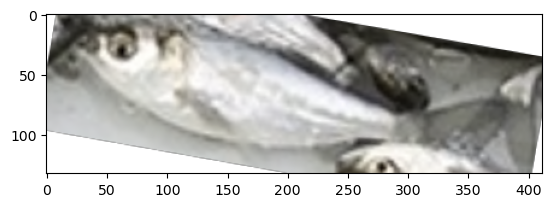

In [31]:
op = Rotate(10)
new_img = op.process(img)
imshow(new_img)

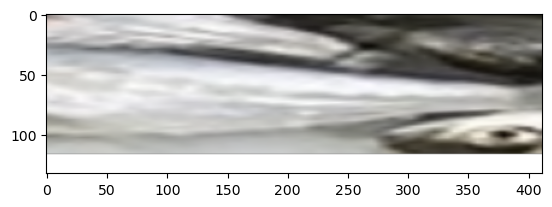

In [33]:
op = Zoom(150, 0, 300, 150)
new_img = op.process(img)
imshow(new_img)

In [ ]:
d = 'SilverCarp'
f = 'silver_carp0.png'
img = imread(img_path)
img_aug_path = 'SilverCarp_aug'
out_file_name = 'silver_carp0_fliph'

in_path = os.path.join(d,f)
if isfile(os.path.join(d,out_file_name)):
    op = Blur(1.0)
    img = op.process(img)
    imsave(os.path.join(d, out_file_name), img)